## 1. Библиотеки

In [19]:
import os
from dataset import indexing
from dataset import preprocess_hist as prepr_hst

## 1. Анализ исходной выборки

In [20]:
test_dataset_path = 'G:\\diplom\\project\\triplet_loss_project_2_06.04\\data\\015_model_marka_year_test'
train_dataset_path = 'G:\\diplom\\project\\triplet_loss_project_2_06.04\\data\\015_model_marka_year_train'

In [21]:
folders = os.listdir(train_dataset_path)
indexes = indexing.get_indexes(folders)

In [22]:
indexes[0]

('1804_truck', 'WR', 'normal', 'truck')

In [23]:
marks_indx_f = lambda x: (x[0],)
models_indx_f = lambda x: (x[0], x[1])

**Марки**

In [24]:
mark_unique_data = prepr_hst.get_unique(indexes, marks_indx_f)
marks_t_indxs, marks_uniqie, marks_code_in = mark_unique_data

In [25]:
marks_hist_data = prepr_hst.get_hist_data(train_dataset_path, folders,
                                          marks_t_indxs, marks_code_in)

  0%|          | 0/6151 [00:00<?, ?it/s]

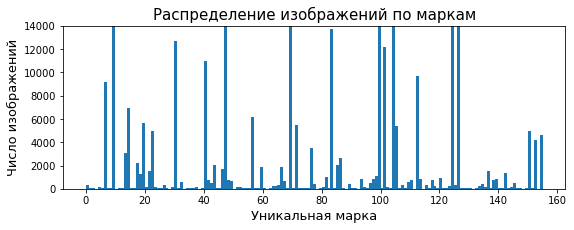

In [26]:
title = 'Распределение изображений по маркам'
xlabel = 'Уникальная марка'
prepr_hst.plot_hist(marks_hist_data, marks_uniqie,
                    title, xlabel, ylim=(0, 14000))

**Модели**

In [30]:
models_unique_data = prepr_hst.get_unique(indexes, models_indx_f)
models_t_indxs, models_uniqie, models_code_in = models_unique_data

In [31]:
models_hist_data = prepr_hst.get_hist_data(train_dataset_path, folders,
                                           models_t_indxs, models_code_in)

  0%|          | 0/6151 [00:00<?, ?it/s]

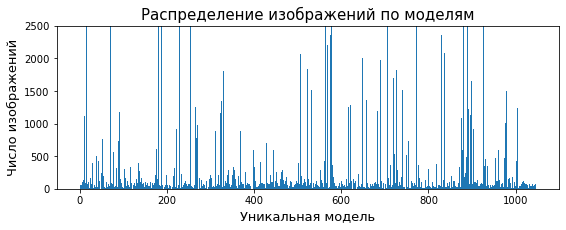

In [32]:
title = 'Распределение изображений по моделям'
xlabel = 'Уникальная модель'
prepr_hst.plot_hist(models_hist_data, models_uniqie,
                    title, xlabel, ylim=(0, 2500))